<a href="https://colab.research.google.com/github/CS20M038/CS6910-assignment_3/blob/main/Assignment3_version2_withencoding_and_Multi_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import Libraries
from random import randint
from numpy import array
from numpy import argmax
import keras.backend as K
from tensorflow.keras import models
from numpy import array_equal
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K

from scipy.ndimage.interpolation import shift
import csv
import random
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
#@title Check GPU
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
input_characters =[' ']
target_characters = [' ']

In [ ]:
input_dict=['-PAD-']
target_dict=['-PAD-']
eng_alphabets = 'abcdefghijklmnopqrstuvwxyz'
pad_char = '-PAD-'

eng_alpha2index = {pad_char: 0}
for index, alpha in enumerate(eng_alphabets):
    eng_alpha2index[alpha] = index+1
    input_dict.append(alpha)

print(eng_alpha2index)
print(input_dict)
# Hindi Unicode Hex Range is 2304:2432. Source: https://en.wikipedia.org/wiki/Devanagari_(Unicode_block)

hindi_alphabets = [chr(alpha) for alpha in range(2304, 2432)]
hindi_alphabet_size = len(hindi_alphabets)

hindi_alpha2index = {pad_char: 0}
for index, alpha in enumerate(hindi_alphabets):
    hindi_alpha2index[alpha] = index+1
    target_dict.append(alpha)
    #print(alpha)

print(hindi_alpha2index)
print(target_dict)


# Hindi Unicode Hex Range is 2304:2432. Source: https://en.wikipedia.org/wiki/Devanagari_(Unicode_block)

hindi_alphabets = [chr(alpha) for alpha in range(2304, 2432)]
hindi_alphabet_size = len(hindi_alphabets)

hindi_index2alpha = {0: pad_char}
for index, alpha in enumerate(hindi_alphabets):
    hindi_index2alpha[index+1] = alpha
   # target_dict.append(alpha)
    #print(alpha)

print(hindi_index2alpha)

eng_alphabets = 'abcdefghijklmnopqrstuvwxyz'
eng_index2alpha = {0: pad_char}
for index, alpha in enumerate(eng_alphabets):
    eng_index2alpha[index+1] = alpha
   # target_dict.append(alpha)
    #print(alpha)

print(eng_index2alpha)

{'-PAD-': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
['-PAD-', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'-PAD-': 0, 'ऀ': 1, 'ँ': 2, 'ं': 3, 'ः': 4, 'ऄ': 5, 'अ': 6, 'आ': 7, 'इ': 8, 'ई': 9, 'उ': 10, 'ऊ': 11, 'ऋ': 12, 'ऌ': 13, 'ऍ': 14, 'ऎ': 15, 'ए': 16, 'ऐ': 17, 'ऑ': 18, 'ऒ': 19, 'ओ': 20, 'औ': 21, 'क': 22, 'ख': 23, 'ग': 24, 'घ': 25, 'ङ': 26, 'च': 27, 'छ': 28, 'ज': 29, 'झ': 30, 'ञ': 31, 'ट': 32, 'ठ': 33, 'ड': 34, 'ढ': 35, 'ण': 36, 'त': 37, 'थ': 38, 'द': 39, 'ध': 40, 'न': 41, 'ऩ': 42, 'प': 43, 'फ': 44, 'ब': 45, 'भ': 46, 'म': 47, 'य': 48, 'र': 49, 'ऱ': 50, 'ल': 51, 'ळ': 52, 'ऴ': 53, 'व': 54, 'श': 55, 'ष': 56, 'स': 57, 'ह': 58, 'ऺ': 59, 'ऻ': 60, '़': 61, 'ऽ': 62, 'ा': 63, 'ि': 64, 'ी': 65, 'ु': 66, 'ू': 67, 'ृ': 68, 'ॄ': 6

In [ ]:
def printTargetWord(seq):
    word = ""
    for chr in seq:
        #print(chr)
        if chr == 0:
            break
        word=word+hindi_index2alpha[int(chr)]
    return word
def printInputWord(seq):
    word = ""
    for chr in seq:
        if chr==0:
            break
        word=word+eng_index2alpha[int(chr)]
    return word

In [ ]:
printInputWord([1, 14, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

'ank'

In [ ]:
def readXmlDataset(filename):
        tsv_file = open(filename)
        read_tsv = csv.reader(tsv_file, delimiter="\t")
        lang1_words = []
        lang2_words = []

        for row in read_tsv:
            lang2_words.append(row[0])
            lang1_words.append(row[1])
            #print(row[0])

        return lang1_words, lang2_words
train_input_texts, train_target_texts = readXmlDataset('hi.translit.sampled.train.tsv')
test_input_texts, test_target_texts = readXmlDataset('hi.translit.sampled.test.tsv')

#Embedding the input texts

In [ ]:
max_length=25
def gt_integer_code(word, letter2index, device = 'cpu'):
    gt_rep = []
    #print(gt_rep)
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        gt_rep.append(pos)
    length = len(gt_rep)
    pad = [0]*(max_length-length)
    gt_rep = gt_rep+pad
   # gt_rep.append(letter2index[pad_char])
    return gt_rep
#print(word_rep('abc',eng_alpha2index))
gt_integer_code('abc',eng_alpha2index)

[1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
def doc_integer_code(doc,letter2index):
    doc_integer_coded=[]
    for i, data in enumerate(doc):
        doc_integer_coded.append(gt_integer_code(data,letter2index))
    return doc_integer_coded
print((doc_integer_code(train_input_texts[0:3],eng_alpha2index)[2]))
train_input_texts[2]

[21, 14, 3, 12, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'uncle'

In [ ]:
def gt_integer_code2(word, letter2index, device = 'cpu'):
    gt_rep = []
    #print(gt_rep)
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        gt_rep.append(pos)
    #length = len(gt_rep)
    #pad = [0]*(max_length-length)
    #gt_rep = gt_rep+pad
    gt_rep.append(letter2index[pad_char])
    return gt_rep
#print(word_rep('abc',eng_alpha2index))
(gt_integer_code2('abc',eng_alpha2index))

[1, 2, 3, 0]

In [ ]:
def doc_integer_code2(doc,letter2index):
    doc_integer_coded=[]
    for i, data in enumerate(doc):
        doc_integer_coded.append(gt_integer_code2(data,letter2index))
    return doc_integer_coded
print((doc_integer_code2(train_input_texts[0:3],eng_alpha2index)[2]))
train_input_texts[2]
doc_integer_code2(train_input_texts,eng_alpha2index)[2]

[21, 14, 3, 12, 5, 0]


[21, 14, 3, 12, 5, 0]

In [ ]:
def get_embedding2(dataset,letter2index):
    encoded_docs=doc_integer_code2(dataset,letter2index)
    padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    padded_docs =encoded_docs
    return model_embed.predict(padded_docs)

In [ ]:
#encoded_docs=doc_integer_code(train_input_texts,eng_alpha2index)
max_length = 25
vocab_size = 50
embedding_size=125
#padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define the model
model_embed = Sequential()
model_embed.add(Embedding(vocab_size, embedding_size, input_length=max_length))
model_embed.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model_embed.summary())
def get_embedding(dataset,letter2index):
    encoded_docs=doc_integer_code(dataset,letter2index)
    #padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    padded_docs =encoded_docs
    return model_embed.predict(padded_docs)


#X_train_padded = model_embed.predict(padded_docs)
#print(X_train_padded.shape)
#print(type(X_train_padded))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 125)           6250      
Total params: 6,250
Trainable params: 6,250
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_train_padded = get_embedding(train_input_texts,eng_alpha2index)
print(X_train_padded.shape)
print(type(X_train_padded))
X_test_padded = get_embedding(test_input_texts,eng_alpha2index)
print(X_test_padded.shape)
print(type(X_test_padded))

(44204, 25, 125)
<class 'numpy.ndarray'>
(4502, 25, 125)
<class 'numpy.ndarray'>


In [ ]:
#X_test_padded[0]

In [ ]:
len(X_test_padded)

4502

In [ ]:
X_test=[]
lengthV=doc_integer_code2(test_input_texts,eng_alpha2index)
for i in range(len(X_test_padded)):
 # print(i)
  X_test.append(X_test_padded[i][0:len(lengthV[i]),])
X_test= np.array(X_test)

X_train=[]
lengthV=doc_integer_code2(train_input_texts,eng_alpha2index)
for i in range(len(X_train_padded)):
  #print(i)
  X_train.append(X_train_padded[i][0:len(lengthV[i]),])
X_train= np.array(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


In [ ]:
X_test[0].shape

(4, 125)

#Encoding target texts

In [ ]:
def word_rep(word, letter2index, device = 'cpu'):
    rep = np.zeros((len(word)+1,  129))
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        rep[letter_index][pos] = 1
    pad_pos = letter2index[pad_char]
    rep[letter_index+1][pad_pos] = 1
    return rep

def gt_rep(word, letter2index, device = 'cpu'):
    gt_rep = np.zeros([len(word)+1, 1], dtype=np.long)
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        gt_rep[letter_index][0] = pos
    gt_rep[letter_index+1][0] = letter2index[pad_char]
    return gt_rep
    word_rep('abc',eng_alpha2index).shape
    x=gt_rep('abc',eng_alpha2index)

In [ ]:
def createDataset(dataset,letter2index):
    X_train=[]
    for i,data in enumerate(dataset):
        #print(data)
        X_train.append(word_rep(data,letter2index))
    X_train = np.array(X_train)
    return X_train

In [ ]:
X_train_orig = createDataset(train_input_texts,eng_alpha2index)
y_train = createDataset(train_target_texts,hindi_alpha2index)
X_test_orig = createDataset(test_input_texts,eng_alpha2index)
y_test = createDataset(test_target_texts,hindi_alpha2index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
print(len(eng_alpha2index))
#a=[0]*(len(eng_alpha2index)-1)
a=[0]*128
eng_pad=[1]
eng_pad=eng_pad+a
print(eng_pad)
print(len(hindi_alpha2index))
a=[0]*128
hindi_pad=[1]
hindi_pad=hindi_pad+a
print(hindi_pad)

27
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
129
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

In [ ]:
one_hot_encode([1,2,3],10)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [ ]:
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]
'''d=one_hot_decode(y_train_padded[5])
c=hindi_index2alpha[6]+hindi_index2alpha[3]+hindi_index2alpha[22]+hindi_index2alpha[66]+hindi_index2alpha[49]+hindi_index2alpha[64]+hindi_index2alpha[37]+hindi_index2alpha[0]
c'''

'd=one_hot_decode(y_train_padded[5])\nc=hindi_index2alpha[6]+hindi_index2alpha[3]+hindi_index2alpha[22]+hindi_index2alpha[66]+hindi_index2alpha[49]+hindi_index2alpha[64]+hindi_index2alpha[37]+hindi_index2alpha[0]\nc'

In [ ]:
max_input_sequence= 25
#max(len(seq) for seq in X_train)
max_output_sequence= 25
#max(len(seq) for seq in y_train)

print('max_input_sequence: ', max_input_sequence)
print('max_output_sequence: ', max_output_sequence)

max_input_sequence:  25
max_output_sequence:  25


In [ ]:
from keras.preprocessing.sequence import pad_sequences
#X_train_padded = pad_sequences(X_train, maxlen= max_input_sequence, padding='post', value=eng_pad)
y_train_padded = pad_sequences(y_train, maxlen= max_output_sequence, padding='post', value=hindi_pad)
#print("X_train shape: ",X_train.shape)
print("X_train_padded shape: ",X_train_padded.shape)
print("y_train shape: ",y_train.shape)
print("y_train_padded shape: ",y_train_padded.shape)
print(type(X_train_padded))
#print("X_test shape: ",X_test.shape)
#print("X_test_padded shape: ",X_test_padded.shape)
#print("y_test shape: ",y_test.shape)
#print("y_test_padded shape: ",y_test_padded.shape)
#print(type(X_test_padded))

X_train_padded shape:  (44204, 25, 125)
y_train shape:  (44204,)
y_train_padded shape:  (44204, 25, 129)
<class 'numpy.ndarray'>


In [ ]:
#X_test_padded = pad_sequences(X_test, maxlen= max_input_sequence, padding='post', value=eng_pad)

y_test_padded = pad_sequences(y_test, maxlen= max_output_sequence, padding='post', 
                              value=hindi_pad)
#print("X_test shape: ",X_test.shape)
print("X_test_padded shape: ",X_test_padded.shape)
print("y_test shape: ",y_test.shape)
print("y_test_padded shape: ",y_test_padded.shape)

X_test_padded shape:  (4502, 25, 125)
y_test shape:  (4502,)
y_test_padded shape:  (4502, 25, 129)


#print sample sequence

In [ ]:
i=0
print("____Sample Input (Raw Format)____")
print("Original:\n", doc_integer_code2(train_input_texts,eng_alpha2index)[i])
print("Padded:\n",doc_integer_code(train_input_texts,eng_alpha2index)[i])
print("____Corresponding Output (Raw Format)____")
print("Original:\n", one_hot_decode(y_train[i]))
print("Padded:\n",one_hot_decode(y_train_padded[i]))

____Sample Input (Raw Format)____
Original:
 [1, 14, 0]
Padded:
 [1, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
____Corresponding Output (Raw Format)____
Original:
 [6, 3, 0]
Padded:
 [6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#Prepare TRAIN data set
input_dimension = embedding_size
output_dimension = 129
encoder_input_data = X_train_padded.copy()
decoder_target_data = y_train_padded.copy()
decoder_input_data = decoder_target_data.copy()
for i, samples in enumerate(decoder_target_data):
  seq = one_hot_decode(samples)
  shifted= shift(seq, 1, cval=0)
  decoder_input_data[i]=one_hot_encode(shifted,output_dimension)
print("Data for Train")
'''print('encoder_input_data (X): ', one_hot_decode(encoder_input_data[1]))
print('decoder_input_data (teacher forcing): ',one_hot_decode(decoder_input_data[1]))
print('decoder_target_data (y):',one_hot_decode(decoder_target_data[1]))'''
print("encoder_input_shape",encoder_input_data.shape)
print("decoder_input_shape",decoder_input_data.shape)

#Prepare TEST data set
encoder_input_test = X_test_padded.copy()
decoder_target_test = y_test_padded.copy()
decoder_input_test= decoder_target_test.copy()
for i, samples in enumerate(decoder_target_test):
  seq = one_hot_decode(samples)
  shifted= shift(seq, 1, cval=0)
  decoder_input_test[i]=one_hot_encode(shifted,output_dimension)

Data for Train
encoder_input_shape (44204, 25, 125)
decoder_input_shape (44204, 25, 129)


In [ ]:
# Define an input sequence and process it.
latent_dims = [1024, 512,  256]
encoder_inputs= Input(shape=(max_input_sequence, input_dimension), name='encoder_inputs')
masking = tf.keras.layers.Masking(mask_value= [1]+[0]*(input_dimension-1))
encoder_inputs_masked = masking(encoder_inputs)
#masking = tf.keras.layers.Masking(mask_value= hindi_pad)
#encoder_inputs = masking(encoder_inputs)

outputs = encoder_inputs
encoder_states = []
for j in range(len(latent_dims))[::-1]:
    outputs, h, c = LSTM(latent_dims[j], return_state=True, return_sequences=bool(j))(outputs)
    encoder_states += [h, c]



decoder_inputs = Input(shape=(None, output_dimension), name='decoder_inputs')
outputs = decoder_inputs
output_layers = []
for j in range(len(latent_dims)):
    output_layers.append(
        LSTM(latent_dims[len(latent_dims) - j - 1], return_sequences=True, return_state=True)
    )
    outputs, dh, dc = output_layers[-1](outputs, initial_state=encoder_states[2*j:2*(j+1)])


decoder_dense = Dense(output_dimension, activation='softmax')
decoder_outputs = decoder_dense(outputs)



# put together
model_encoder_training = Model([encoder_inputs, decoder_inputs], decoder_outputs, name='model_encoder_training')

Model: "model_encoder_training"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_inputs (InputLayer)     [(None, 25, 125)]    0                                            
__________________________________________________________________________________________________
decoder_inputs (InputLayer)     [(None, None, 129)]  0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 25, 256), (N 391168      encoder_inputs[0][0]             
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, None, 256),  395264      decoder_inputs[0][0]             
                                                                 lstm[0][1]  

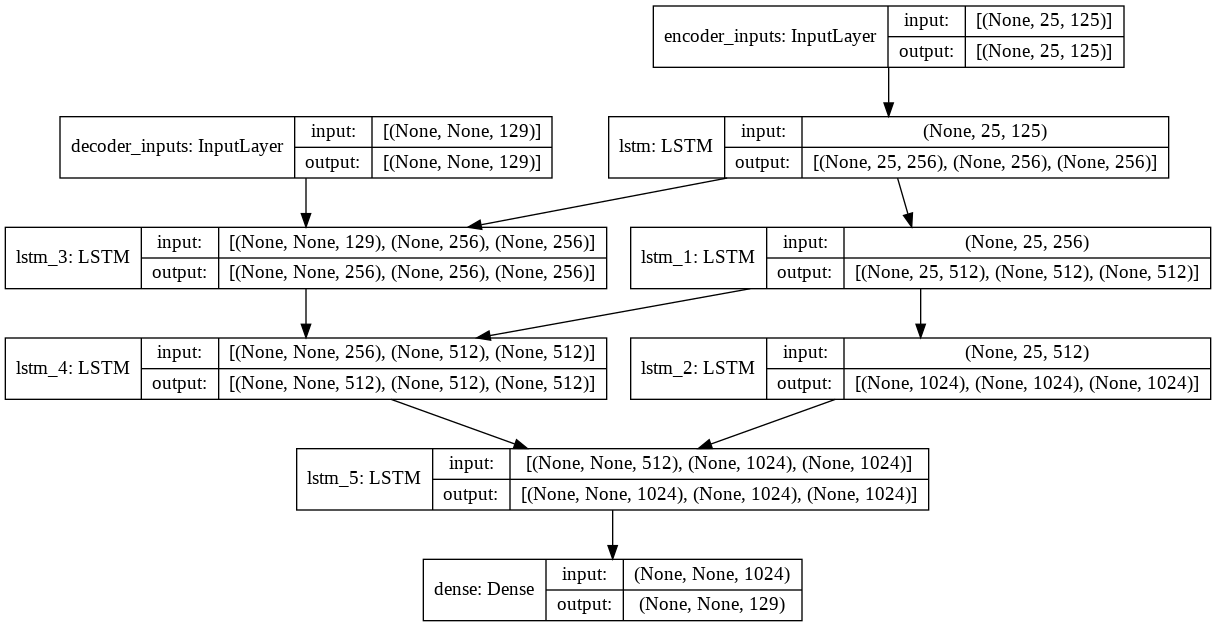

In [ ]:
model_encoder_training.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_encoder_training.summary()
plot_model(model_encoder_training, show_shapes=True)

In [ ]:
model_encoder_training.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=64,
          epochs=20,
          validation_split=0.2)

Epoch 1/20
553/553 [==============================] - 75s 69ms/step - loss: 1.0267 - accuracy: 0.7639 - val_loss: 0.9682 - val_accuracy: 0.7762
Epoch 2/20
553/553 [==============================] - 37s 67ms/step - loss: 0.6730 - accuracy: 0.8122 - val_loss: 0.9532 - val_accuracy: 0.7921
Epoch 3/20
553/553 [==============================] - 37s 67ms/step - loss: 0.4841 - accuracy: 0.8569 - val_loss: 0.8344 - val_accuracy: 0.8107
Epoch 4/20
553/553 [==============================] - 38s 68ms/step - loss: 0.3582 - accuracy: 0.8895 - val_loss: 0.8073 - val_accuracy: 0.8182
Epoch 5/20
553/553 [==============================] - 38s 69ms/step - loss: 0.2621 - accuracy: 0.9178 - val_loss: 0.7739 - val_accuracy: 0.8241
Epoch 6/20
553/553 [==============================] - 38s 70ms/step - loss: 0.1906 - accuracy: 0.9399 - val_loss: 0.8180 - val_accuracy: 0.8313
Epoch 7/20
553/553 [==============================] - 39s 70ms/step - loss: 0.1395 - accuracy: 0.9562 - val_loss: 0.8417 - val_accuracy:

In [ ]:
#title Function to Train & Test  given model (Early Stopping monitor 'val_loss')
def train_test(model, X_train, y_train , X_test, 	y_test, epochs=500, batch_size=32, patience=5,verbose=0):
	# patient early stopping
	#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1, patience=20)
	es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience)
	# train model
	print('training for ',epochs,' epochs begins with EarlyStopping(monitor= val_loss, patience=',patience,')....')
	history=model.fit(X_train, y_train, validation_split= 0.1, epochs=epochs,batch_size=batch_size, verbose=verbose, callbacks=[es])
	print(epochs,' epoch training finished...')

	# report training
	# list all data in history
	#print(history.history.keys())
	# evaluate the model
	_, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
	_, test_acc = model.evaluate(X_test, 	y_test, batch_size=batch_size, verbose=0)
	print('\nPREDICTION ACCURACY (%):')
	print('Train: %.3f, Test: %.3f' % (train_acc*100, test_acc*100))
	# summarize history for accuracy
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title(model.name+' accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()
	# summarize history for loss
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title(model.name+' loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()




  
	# spot check some examples
	space = 3*len(one_hot_decode(y_test[0]))
	print('10 examples from test data...')
	print('Input',' '*(space-4) ,'Expected',' '*(space-7) ,
	      'Predicted',' '*(space-5) ,'T/F')
	correct =0 
	sampleNo =  100
  #model = model_encoder_training

	predicted= model.predict(X_test[:sampleNo], batch_size=batch_size)
	for sample in range(0,sampleNo):
		if (one_hot_decode(y_test[sample])== one_hot_decode(predicted[sample])):
			correct+=1
		print(test_input_texts[sample], ' ', 
					printTargetWord(one_hot_decode(y_test[sample])),' ', printTargetWord(one_hot_decode(predicted[sample])),
					' ',one_hot_decode(y_test[sample])== one_hot_decode(predicted[sample]))
	print('Accuracy: ', correct/sampleNo)

In [ ]:
model = model_encoder_training
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]
X_test[:1].shape

(None, 25, 125) <dtype: 'float32'>
(None, None, 129) <dtype: 'float32'>
(None, None, 129) <dtype: 'float32'>
encoder_inputs [(None, 25, 125)] float32
decoder_inputs [(None, None, 129)] float32
lstm (None, 25, 125) float32
lstm_3 [(None, None, 129), (None, 256), (None, 256)] float32
lstm_1 (None, 25, 256) float32
lstm_4 [(None, None, 256), (None, 512), (None, 512)] float32
lstm_2 (None, 25, 512) float32
lstm_5 [(None, None, 512), (None, 1024), (None, 1024)] float32
dense (None, None, 1024) float32


(1,)

training for  20  epochs begins with EarlyStopping(monitor= val_loss, patience= 3 )....
Epoch 1/20
622/622 - 40s - loss: 0.0670 - accuracy: 0.9804 - val_loss: 0.6187 - val_accuracy: 0.8657
Epoch 2/20
622/622 - 40s - loss: 0.0326 - accuracy: 0.9901 - val_loss: 0.6582 - val_accuracy: 0.8662
Epoch 3/20
622/622 - 40s - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.6787 - val_accuracy: 0.8640
Epoch 4/20
622/622 - 40s - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.6510 - val_accuracy: 0.8659
Epoch 00004: early stopping
20  epoch training finished...

PREDICTION ACCURACY (%):
Train: 97.872, Test: 92.826


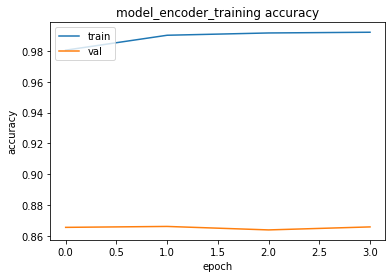

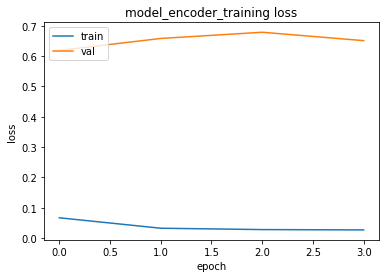

10 examples from test data...
Input                                                                         Expected                                                                      Predicted                                                                        T/F
ank   अंक   एंक   False
anka   अंक   आंका   False
ankit   अंकित   अंक्त   False
anakon   अंकों   आंकों   False
ankhon   अंकों   आंखनं   False
ankon   अंकों   आंकों   False
angkor   अंकोर   अंगूर   False
ankor   अंकोर   अंकुर   False
angaarak   अंगारक   अनगारा   False
angarak   अंगारक   अंगारा   False
angraji   अंग्रज़ी   अंग्रजीी   False
angreji   अंग्रज़ी   अंग्रजीी   False
angrzi   अंग्रज़ी   अंग्रजीी   False
antah   अंतः   अंता   False
antaha   अंतः   अंता   False
antarmukh   अंतर्मुख   अंतर्दतक   False
antmurkh   अंतर्मुख   अंतर्गकक   False
antrmukh   अंतर्मुख   अंतर्मशश   False
andrabee   अंद्राबी   अंदररजज्   False
andrabi   अंद्राबी   अंदररजजी   False
andha   अंधा   अंधा   True
andhapan   अंधापन   अंधापन   True
a

In [ ]:
train_test(model_encoder_training, [encoder_input_data, decoder_input_data], decoder_target_data ,
           [encoder_input_test, decoder_input_test], 
           decoder_target_test, epochs=20, batch_size=64, patience=3,verbose=2)


In [ ]:
# Define sampling models (modified for n-layer deep network)
encoder_model = Model(encoder_inputs, encoder_states)
d_outputs = decoder_inputs
decoder_states_inputs = []
decoder_states = []
for j in range(len(latent_dims))[::-1]:
    current_state_inputs = [Input(shape=(latent_dims[j],)) for _ in range(2)]

    temp = output_layers[len(latent_dims)-j-1](d_outputs, initial_state=current_state_inputs)

    d_outputs, cur_states = temp[0], temp[1:]

    decoder_states += cur_states
    decoder_states_inputs += current_state_inputs

decoder_outputs = decoder_dense(d_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [ ]:
def decode_sequence(input_seq, encoder_model=encoder_model, decoder_model=decoder_model):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, output_dimension))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, 0] = 1 

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = []  #Creating a list then using "".join() is usually much faster for string creation
    while not stop_condition:
        to_split = decoder_model.predict([target_seq] + states_value)

        output_tokens, states_value = to_split[0], to_split[1:]

       


        # convert the token/output prediction to a token/output
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = sampled_token_index
        # add the predicted token/output to output sequence
        decoded_sentence.append(sampled_char)



        # Exit condition: either hit max length
        # or find stop character.
        if sampled_char == 0 or len(decoded_sentence) >=  max_output_sequence:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, output_dimension))
        target_seq[0, 0, sampled_token_index] = 1.

    return decoded_sentence


In [ ]:
print('Input \t\t\t\t\t  Expected  \t\t\t   Predicted \t\t\t\t\t\t\t T/F')
correct =0 
sampleNo =  100
for sample in range(0,sampleNo):
  predicted= decode_sequence(encoder_input_data[sample].reshape(1,max_input_sequence,input_dimension))
  if (one_hot_decode(decoder_target_data[sample])== predicted+ [0] * (max_output_sequence- len(predicted))):
    correct+=1
  print( train_input_texts[sample], '\t\t', 
        printTargetWord( one_hot_decode(decoder_target_data[sample])),'\t', printTargetWord(predicted),
        '\t\t', one_hot_decode(decoder_target_data[sample])== predicted+ [0] * (max_output_sequence- len(predicted)))
print('Accuracy: ', correct/sampleNo)

Input 					  Expected  			   Predicted 							 T/F
an 		 अं 	 अन 		 False
ankganit 		 अंकगणित 	 अंकगणित 		 True
uncle 		 अंकल 	 अंकल 		 True
ankur 		 अंकुर 	 अंकुर 		 True
ankuran 		 अंकुरण 	 अंकुरण 		 True
ankurit 		 अंकुरित 	 अंकुरित 		 True
aankush 		 अंकुश 	 आशीष 		 False
ankush 		 अंकुश 	 अंकुश 		 True
ang 		 अंग 	 अंग 		 True
anga 		 अंग 	 अंग 		 True
agandh 		 अंगद 	 अंदाज़ 		 False
angad 		 अंगद 	 अंगद 		 True
angane 		 अंगने 	 आंगने 		 False
angbhang 		 अंगभंग 	 अंगभंग 		 True
angarakshak 		 अंगरक्षक 	 अंगरक्षक 		 True
angrakshak 		 अंगरक्षक 	 अंगरक्षक 		 True
angara 		 अंगारा 	 अंगारा 		 True
angaare 		 अंगारे 	 अंगारे 		 True
angare 		 अंगारे 	 अंगारे 		 True
angi 		 अंगी 	 अंगी 		 True
angikar 		 अंगीकार 	 अंगीकार 		 True
anguthe 		 अंगुठे 	 अंगुठे 		 True
angul 		 अंगुल 	 अंगुल 		 True
anguliyon 		 अंगुलियों 	 अंगुलियों 		 True
anguli 		 अंगुली 	 अंगुली 		 True
ungli 		 अंगुली 	 अंगुली 		 True
angutha 		 अंगूठा 	 अंगूठा 		 True
aanguthiyon 		 अंगूठियों 	 अंगूठियों 		 True


In [ ]:
print('Input \t\t\t\t\t  Expected  \t\t\t   Predicted \t\t\t\t\t\t\t T/F')
correct =0 
sampleNo =  100
for sample in range(0,sampleNo):
  predicted= decode_sequence(encoder_input_data[sample].reshape(1,max_input_sequence,input_dimension))
  if (one_hot_decode(decoder_target_data[sample])== predicted+ [0] * (max_output_sequence- len(predicted))):
    correct+=1
  print( train_input_texts[sample], '\t\t', 
        printTargetWord( one_hot_decode(decoder_target_data[sample])),'\t', printTargetWord(predicted),
        '\t\t', one_hot_decode(decoder_target_data[sample])== predicted+ [0] * (max_output_sequence- len(predicted)))
print('Accuracy: ', correct/sampleNo)

Input 					  Expected  			   Predicted 							 T/F
an 		 अं 	 अन 		 False
ankganit 		 अंकगणित 	 अंकगणित 		 True
uncle 		 अंकल 	 अंकल 		 True
ankur 		 अंकुर 	 अंकुर 		 True
ankuran 		 अंकुरण 	 अंकुरण 		 True
ankurit 		 अंकुरित 	 अंकुरित 		 True
aankush 		 अंकुश 	 आशीष 		 False
ankush 		 अंकुश 	 अंकुश 		 True
ang 		 अंग 	 अंग 		 True
anga 		 अंग 	 अंग 		 True
agandh 		 अंगद 	 अंदाज़ 		 False
angad 		 अंगद 	 अंगद 		 True
angane 		 अंगने 	 आंगने 		 False
angbhang 		 अंगभंग 	 अंगभंग 		 True
angarakshak 		 अंगरक्षक 	 अंगरक्षक 		 True
angrakshak 		 अंगरक्षक 	 अंगरक्षक 		 True
angara 		 अंगारा 	 अंगारा 		 True
angaare 		 अंगारे 	 अंगारे 		 True
angare 		 अंगारे 	 अंगारे 		 True
angi 		 अंगी 	 अंगी 		 True
angikar 		 अंगीकार 	 अंगीकार 		 True
anguthe 		 अंगुठे 	 अंगुठे 		 True
angul 		 अंगुल 	 अंगुल 		 True
anguliyon 		 अंगुलियों 	 अंगुलियों 		 True
anguli 		 अंगुली 	 अंगुली 		 True
ungli 		 अंगुली 	 अंगुली 		 True
angutha 		 अंगूठा 	 अंगूठा 		 True
aanguthiyon 		 अंगूठियों 	 अंगूठियों 		 True


#Test custom words

In [ ]:
test_word_set = ['kamal','gulab','radha','krishna','sita','ram']
X_test_word_padded = get_embedding(test_word_set,eng_alpha2index)
'''X_test_word=createDataset(test_word_set,eng_alpha2index)
X_test_word_padded=pad_sequences(X_test_word, maxlen= max_input_sequence, padding='post', value=eng_pad)
print("X_test_word shape: ",X_test_word.shape)
print("X_test_word_padded shape: ",X_test_word_padded.shape)'''
encoder_test_word_input_data = X_test_word_padded.copy()
correct =0 
sampleNo= len(test_word_set)
for i in range(sampleNo):
    decode_seq= decode_sequence(encoder_test_word_input_data[i].reshape(1,max_input_sequence,input_dimension))
    print(test_word_set[i],end=" ")
    print(printTargetWord(decode_seq[:-1]))
#print('Accuracy: ', correct/sampleNo)
    


kamal कमल
gulab गुलाब
radha राधा
krishna कृष्ण
sita शीता
ram राम


In [ ]:
randomlist = []
for i in range(0,10):
    n = random.randint(100,1000)
    randomlist.append(n)
print(randomlist)
for seq_index in randomlist:
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_test[seq_index : seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print("-")
    #print("Input sentence:", input_texts[seq_index])
    print("Input sentence:", test_input_texts[seq_index])
    print("Decoded sentence:", printTargetWord(decoded_sentence))

[175, 464, 975, 439, 627, 259, 696, 758, 456, 841]
-
Input sentence: arymaa
Decoded sentence: आर्जाया
-
Input sentence: uttra
Decoded sentence: उत्तरा
-
Input sentence: galgand
Decoded sentence: गलंग्र
-
Input sentence: uchhalane
Decoded sentence: उछलने
-
Input sentence: oklahoma
Decoded sentence: ओखलुआ
-
Input sentence: ounce
Decoded sentence: ऊंच
-
Input sentence: kapda
Decoded sentence: कपड़ा
-
Input sentence: kanti
Decoded sentence: कनकीन
-
Input sentence: udaanen
Decoded sentence: उदानीन
-
Input sentence: cateline
Decoded sentence: कैटिलिन
